# Aprendizagem Computacional - Projeto 01
# Regressão aplicada à esperança média de vida
## Alix Carmo nº23324 & Vasco Araújo nº23049

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from itertools import combinations, product
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
df = pd.read_csv("./datasets/Life Expectancy Data.csv")

df.head(9)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4


## Análise Exploratória dos Dados (EDA)

In [3]:
#número de linhas e colunas
print("Número de Registos :",df.shape[0])
print("Número de colunas :",df.shape[1])
#lista com os nomes das colunas
print("\nColunas :",df.columns.tolist())
#registos null ou Not a Number(NaN) em cada coluna
print("\nRegistos NaN por coluna:\n", df.isnull().sum())
#obter estatísticas descritivas neste caso para a coluna 'Life expectancy '
#o mesmo pode ser realizado para as outras colunas especialmente as númericas
print("\nEstatísticas Descritivas :",df.describe()['Life expectancy '])

Número de Registos : 2938
Número de colunas : 22

Colunas : ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

Registos NaN por coluna:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria 

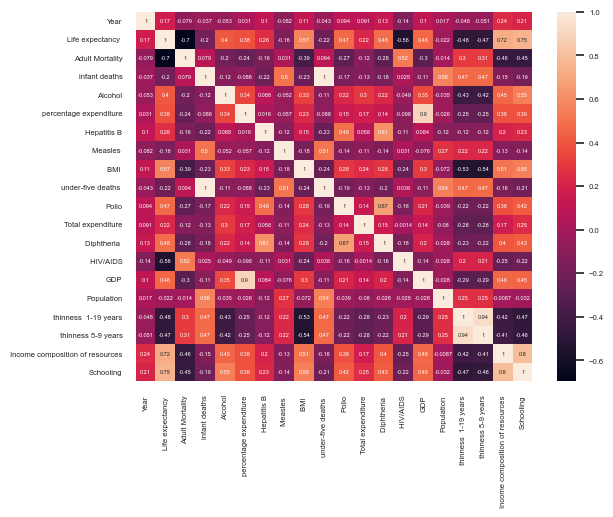

In [4]:
#heat map
sns.set(font_scale=0.5)
sns.heatmap(df.corr(),annot=True,annot_kws={'size': 4})
sns.set(font_scale=1)

## Transformação dos dados

In [5]:
#transformação dos paises em valores númericos
label_encoder = preprocessing.LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

#transformação dos estados de desenvolvimento em valores númericos
numeric_var = {'Status': {'Developing':1, 'Developed':2}} 
df = df.replace(numeric_var)

#replace all empty values with 0
df.fillna(0, inplace=True)

df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Outliers

In [6]:
#Calculo do quartis 25 e 75
q25, q75 = np.percentile(df['Life expectancy '], [25, 75])
# calculo do distancia entre quartis
iqr = q75 - q25
#Determinar outliers
outliers_mask = (df['Life expectancy '] < (q25 - 1.5 * iqr)) | (df['Life expectancy '] > (q75 + 1.5 * iqr))
print("Número de outliers :", outliers_mask.sum())
# Remover outliers do DataFrame
df = df[~outliers_mask]

Número de outliers : 20


## Simple Linear Regression

In [7]:
def my_regression_function(datax, datay,label_axis_x="x",label_axis_y="y"):
    # Convert to numpy arrays
    X = datax.values.reshape(-1, 1)
    y = datay.values.reshape(-1, 1)

    # Split the data into training and test sets
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

    # Train a linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(train_x, train_y)

    #Coefficients
    regr.coef_[0][0] # Coefficient
    regr.intercept_[0] # Intercept

    # Predictions on the test data
    test_y_pred = regr.predict(test_x)

    # Calculate RMSE and r2
    rmse = mean_squared_error(test_y, test_y_pred, squared=False)
    r2 = r2_score(test_y, test_y_pred)
    
    return regr, rmse, r2
    

In [8]:
# Find the index of 'Life expectancy' column
Adult_Mortality_index = df.columns.get_loc('Adult Mortality')

# Use .iloc to slice the DataFrame from the 'Life expectancy' column index to the end
cdf = df.iloc[:, Adult_Mortality_index:]

cdf.head(9)


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4


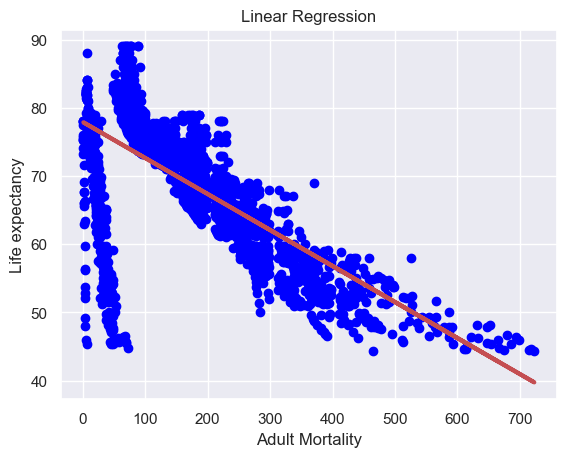

In [9]:
target = df[['Life expectancy ']]
slr_bestR2 = float("-inf")
slr_bestRMSE = float("inf")
slr_bestRegr = None
slr_bestColumn = ""
for i in cdf.columns:
    regr, rmse, r2 = my_regression_function(cdf[[i]], target)
    if(slr_bestR2 < r2):
        slr_bestR2 = r2
        slr_bestRMSE = rmse
        slr_bestRegr = regr
        slr_bestColumn = i
# Visualize the results
y_pred = slr_bestRegr.predict(cdf[slr_bestColumn].values.reshape(-1, 1))
plt.scatter(cdf[slr_bestColumn], target, color='blue')
plt.plot(cdf[slr_bestColumn], y_pred, '-r', linewidth=3)
plt.xlabel(slr_bestColumn)
plt.ylabel('Life expectancy')
plt.title(f'Linear Regression')
plt.show()

## Multiple Linear Regression

In [10]:
def my_multiple_regression_function(X,y):
    # Split the data into training and test sets
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = 42)

    # Train a linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(train_x, train_y)

    # Predictions on the test data
    test_y_pred = regr.predict(test_x)

    # Calculate RMSE and r2
    rmse = mean_squared_error(test_y, test_y_pred, squared=False)
    r2 = r2_score(test_y, test_y_pred)

    return regr, rmse, r2

In [11]:
# The code below is commented because it takes a long time to run
cdf_col= cdf.columns
mlr_bestR2 = float('-inf')
mlr_bestRMSE = float('inf')
mlr_bestCombination = None
mlr_bestRegr = None

# Iterate over all combinations of columns starting from 1 column to len(cdf_col) columns
for i in range(1, len(cdf_col) + 1):
    for combo in combinations(cdf_col, i):
        # Select the current combination of columns for X
        dx = cdf[list(combo)].values
        # Call the regression function with the current X and the target y
        regr, rmse, r2 = my_multiple_regression_function(dx, target)
        
        # Check if the current R^2 is the best one and update the best values and combination
        if r2 > mlr_bestR2: 
            mlr_bestR2 = r2 
            mlr_bestRMSE = rmse
            mlr_bestCombination = combo
            mlr_bestRegr = regr
            
print(f"Melhor r2: {best_r2} com a combinação {best_combination_r2}")

################################################################################
##################################### OUTPUT ###################################

#Melhor r2: 0.8240767942724265 com a combinação ('Adult Mortality', 'infant deaths', 'Alcohol', 
#    'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 
#    ' thinness  1-19 years', 'Income composition of resources', 'Schooling')


'\ncdf_col= cdf.columns\nmlr_bestR2 = float(\'-inf\')\nmlr_bestRMSE = float(\'inf\')\nmlr_bestCombination = None\nmlr_bestRegr = None\n\n# Iterate over all combinations of columns starting from 1 column to len(cdf_col) columns\nfor i in range(1, len(cdf_col) + 1):\n    for combo in combinations(cdf_col, i):\n        # Select the current combination of columns for X\n        dx = cdf[list(combo)].values\n        # Call the regression function with the current X and the target y\n        regr, rmse, r2 = my_multiple_regression_function(dx, target)\n        \n        # Check if the current R^2 is the best one and update the best values and combination\n        if r2 > mlr_bestR2: \n            mlr_bestR2 = r2 \n            mlr_bestRMSE = rmse\n            mlr_bestCombination = combo\n            mlr_bestRegr = regr\n            \nprint(f"Melhor r2: {best_r2} com a combinação {best_combination_r2}")\n\n################################################################################\n######

In [12]:
#The multiple linear regression model with best R2-Score
mlr_bestCombo = df[['Adult Mortality', 'infant deaths', 'Alcohol', 
    'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 
    ' thinness  1-19 years', 'Income composition of resources', 'Schooling']]

mlr_bestRegr, mlr_bestRMSE, mlr_bestR2 = my_multiple_regression_function(mlr_bestCombo, target)

print("RMSE :",mlr_bestRMSE)
print("R2-Score :",mlr_bestR2)


RMSE : 4.433832942316626
R2-Score : 0.7828338812905256


## Mínimos Quadrados Ordinários (OLS)

In [25]:
def MyREG_OLS(X, y):
    X_b = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    theta_est = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_est

In [26]:
cdf = df.drop('Life expectancy ', axis=1)
target = df[['Life expectancy ']]

train_x, test_x, train_y, test_y = train_test_split(cdf, target, test_size=0.2, random_state = 42)

ols_thetas = MyREG_OLS(train_x, train_y)
X_b = np.concatenate([np.ones((test_x.shape[0], 1)), test_x], axis=1)
ols_y_pred = X_b.dot(ols_thetas)

ols_rmse = mean_squared_error(test_y, ols_y_pred, squared=False)
ols_r2 = r2_score(test_y, ols_y_pred)

print("RMSE :",ols_rmse)
print("R2-Score :",ols_r2)

RMSE : 4.275573465844053
R2-Score : 0.7980600872230961


## Gradient Descent

In [27]:
X_train, X_test, y_train, y_test = train_test_split(cdf, target, test_size=0.2, random_state=42)
# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# função para calcular o R2 e RMSE
def evaluate_model(X, y, theta):
    X_b = np.concatenate([np.ones((len(X), 1)), X], axis=1)
    y_pred = X_b.dot(theta)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return r2, rmse

#### Batch Gradient Descent (BGD)

In [17]:
#implementação do algoritmo batch gradient descent
def bgd(X, y, n_iterations=1000, learning_rate=0.001, all_path=0):
    np.random.seed(42)
    thetas_path = []
    m = np.shape(X)[0]
    X_b = np.concatenate([np.ones((m, 1)), X], axis=1)
    thetas = np.random.randn(X_b.shape[1], 1)  # random initialization
    for i in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(thetas) - y.reshape(-1, 1))
        thetas = thetas - learning_rate*gradients
        if all_path == 1:
            thetas_path.append(thetas)  # all iterations
        else:
            thetas_path = thetas
            
    return thetas_path

In [18]:
# pesquisa em grade pelo learning rate e o n_interations
best_rmse = float("inf")
best_lr = None
best_iter = None
best_thetas = None
best_r2 = None

# Cria uma lista com 10 valores em escala logarítmica
learning_rates = np.logspace(-6, -1, 20)
# Cria uma lista com 10 valores em escala linear
n_iterations = np.linspace(100, 1000, 10, dtype=int)

for lr in learning_rates:
    for n_iter in n_iterations:
        theta_bgd = bgd(X_train_scaled, y_train.values, n_iterations=n_iter, learning_rate=lr)
        r2, rmse = evaluate_model(X_test_scaled, y_test, theta_bgd)

        if rmse < best_rmse:
            best_rmse = rmse
            best_r2 = r2
            best_lr = lr
            best_iter = n_iter
            best_thetas = theta_bgd
            
print("Batch Gradient Descent (BGD)")
print(f"R2-Score: {best_r2}")
print(f"RMSE : {best_rmse}")

################################################################################
##################################### OUTPUT ###################################
#Batch Gradient Descent (BGD)
#R2-Score: 0.7922712897201107
#RMSE : 4.336422142861695

Batch Gradient Descent (BGD)
R2-Score: 0.7922712897201107
RMSE : 4.336422142861695


#### Stochastic Gradient Descent (SGD)

In [19]:
#implementação do algoritmo stochastic gradient descent
def sgd(X, y, n_epochs=50, t0=5, t1=50, all_path=0):
    m = np.shape(X)[0]
    X_b = np.concatenate([np.ones((m, 1)), X], axis=1)
    np.random.seed(42)
    thetas = np.random.randn(X_b.shape[1], 1)

    def learning_schedule(t):
        return t0 / (t + t1)

    thetas_path = []
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * np.transpose(xi) @ (xi.dot(thetas) - yi)
            eta = learning_schedule(epoch * m + i)
            thetas = thetas - eta * gradients

            if all_path == 1:
                thetas_path.append(thetas)  # all iterations
            else:
                thetas_path = thetas
                
    return thetas_path

In [20]:
# Defina as listas para cada parâmetro
n_epochs_values = np.linspace(50, 150, 5, dtype=int)
t0_values = np.logspace(-3, 1, 5)
t1_values = np.logspace(-3, 1, 5)
best_thetas = None
best_r2 = None
best_rmse = float("inf")
best_combo = None

# Crie todas as combinações possíveis
combinations = list(product(n_epochs_values, t0_values, t1_values))

# Exiba as combinações
for combination in combinations:
    n_epochs, t0, t1 = combination
    theta_sgd = sgd(X_train_scaled, y_train.values, n_epochs=n_epochs, t0=t0, t1=t1)
    r2, rmse = evaluate_model(X_test_scaled, y_test, theta_sgd)
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_thetas = theta_bgd
        best_combo = combination

print("Stochastic Gradient Descent (SGD)")
print(f"R2-Score: {best_r2}")
print(f"RMSE : {best_rmse}")

################################################################################
##################################### OUTPUT ###################################
#Stochastic Gradient Descent (SGD)
#R2-Score: 0.7703764315116348
#RMSE : 4.55923021291299

Stochastic Gradient Descent (SGD)
R2-Score: 0.7703764315116348
RMSE : 4.55923021291299


#### Mini-batch Gradient Descent (MGD)

In [21]:
#implementação do algoritmo Mini-batch Gradient Descent
def mgd(X, y, n_iterations=50, minibatch_size=20, t0=200, t1=1000, all_path=0):
    m = np.shape(X)[0]
    # Add bias term to input features
    X_b = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Initialize parameters
    np.random.seed(42)
    thetas = np.random.randn(X_b.shape[1], 1)

    def learning_schedule(t):
        return t0 / (t + t1)
    
    thetas_path = []
    t=0
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m) #shuffle the samples
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            
            minibatch_size_atual = xi.shape[0]
            
            gradients = 2/minibatch_size_atual * np.transpose(xi) @ (xi @ thetas - yi.reshape(-1, 1))
            eta = learning_schedule(t)
            thetas = thetas - eta * gradients
            
            if all_path == 1:
                thetas_path.append(thetas)  # all iterations
            else:
                thetas_path = thetas
                
    return thetas_path

In [30]:
#pesquisa em grade dos melhores parametros para o algoritmo mgd
# Lista para n_iterations
n_iterations_values = np.linspace(500, 2000, 4, dtype=int)
# Lista para minibatch_size
minibatch_size_values = np.linspace(32, 128, 3, dtype=int)
# Lista para t0 e t1
t0_values = np.logspace(-4, -2, 3)
t1_values = np.logspace(-2, 0, 3)

best_thetas = None
best_r2 = None
best_rmse = float("inf")
best_combo = None

# Crie todas as combinações possíveis
combinations = list(product(n_iterations_values, minibatch_size_values, t0_values, t1_values))

# Exiba as combinações
for combination in combinations:
    n_iterations, minibatch_size, t0, t1 = combination
    theta_mgd = mgd(X_train_scaled, y_train.values, n_iterations=n_iterations, 
                    minibatch_size=minibatch_size, t0=t0, t1=t1)
    r2, rmse = evaluate_model(X_test_scaled, y_test, theta_sgd)
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_thetas = theta_bgd
        best_combo = combination

print("Mini-batch Gradient Descent (MGD)")
print(f"R2-Score: {best_r2}")
print(f"RMSE : {best_rmse}")

################################################################################
##################################### OUTPUT ###################################
#Mini-batch Gradient Descent (MGD)
#R2-Score: -1.1424428739588815e+62
#RMSE : 1.0169521938525877e+32

Mini-batch Gradient Descent (MGD)
R2-Score: -1.1424428739588815e+62
RMSE : 1.0169521938525877e+32


## Regressão não linear

In [23]:
#função para determinar qual o melhor modelo de regressão polinomial
#tendo como parametro de avaliação o menor RMSE
def bestPolyRegression(X, y, X_test, y_test):
    best_rmse = float('inf')
    best_model = None
    best_degree = None
    best_r2 = None
    for degree in range(2,7):
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly_features.fit_transform(X) #fit and transform data
        X_test_poly = poly_features.transform(X_test)
        
        lin_reg = linear_model.LinearRegression()
        lin_reg.fit(X_poly, y) #train regression model

        y_test_predict = lin_reg.predict(X_test_poly)
        y_predict = lin_reg.predict(X_poly)
        
        rmse = mean_squared_error(y_test, y_test_predict, squared=False)
        r2 = r2_score(y_test, y_test_predict)
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_poly = poly_features
            best_model = lin_reg
            best_r2 = r2
            
    return best_model, poly_features, best_rmse, best_r2

In [24]:
#obter o melhor modelo polinomial para os dados
model, poly, rmse, r2 = bestPolyRegression(X_train,y_train,X_test, y_test)

print("Best R2:",r2)
print("Best RMSE:", rmse)
print("Degree :",poly.degree)

################################################################################
##################################### OUTPUT ###################################
#Best R2: 0.8320104218414421
#Best RMSE: 3.899639500049622
#Degree : 6

Best R2: 0.8320104218414421
Best RMSE: 3.899639500049622
Degree : 6
